# Unsupervised Machine Learning - KMeans

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. SVMs are one of the most robust prediction methods. 

Sources: 
[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans), [wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

![kmeans.png](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/52579/versions/9/screenshot.jpg)

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [55]:
# Take make moons in built dataset

data_ = datasets.make_moons(100)

In [ ]:
# check the dataset

data_

(array([[-3.45365054e-01,  9.38468422e-01],
        [ 9.26916757e-01,  3.75267005e-01],
        [ 3.27051370e-02,  2.46345416e-01],
        [ 7.15472413e-01, -4.58667853e-01],
        [-3.20515776e-02,  9.99486216e-01],
        [ 9.97945393e-01,  6.40702200e-02],
        [ 1.94905575e+00,  1.84891782e-01],
        [ 1.61911895e-01, -4.55349012e-02],
        [ 9.67294863e-01,  2.53654584e-01],
        [ 5.72116660e-01,  8.20172255e-01],
        [ 7.61445958e-01,  6.48228395e-01],
        [ 8.40400105e-01, -4.87181783e-01],
        [ 2.00000000e+00,  5.00000000e-01],
        [ 8.38088105e-01,  5.45534901e-01],
        [ 1.57211666e+00, -3.20172255e-01],
        [-7.61445958e-01,  6.48228395e-01],
        [-9.97945393e-01,  6.40702200e-02],
        [-9.91790014e-01,  1.27877162e-01],
        [-4.62538290e-01,  8.86599306e-01],
        [-2.22520934e-01,  9.74927912e-01],
        [ 1.34536505e+00, -4.38468422e-01],
        [ 5.95216657e-01, -4.14412623e-01],
        [ 9.00968868e-01,  4.338

In [25]:
# create input dataframe

inputData = pd.DataFrame(data = data_[0])

In [ ]:
inputData.head()

,0,1
0,-0.345365,0.938468
1,0.926917,0.375267
2,0.032705,0.246345
3,0.715472,-0.458668
4,-0.032052,0.999486


In [26]:
# create output dataframe

outputData = pd.DataFrame(data = data_[1])
outputData.head()

,0
0,1
1,1
2,0
3,0
4,1


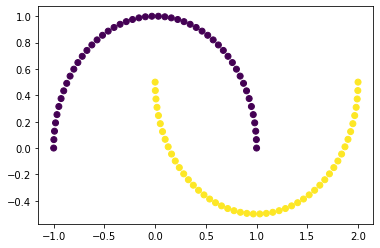

In [27]:
# create a scatter plot for inputData set

plt.scatter(inputData[0], inputData[1], c = outputData)

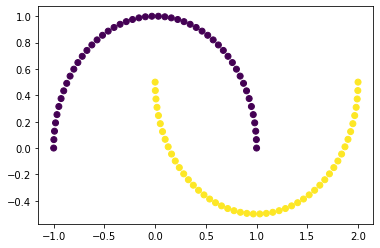

In [30]:
# create a scatter plot for inputData set with outputData color

plt.scatter(inputData[0], inputData[1], c = outputData)


In [36]:
from sklearn.cluster import KMeans

In [57]:

model = KMeans(n_clusters=2)
model.fit(inputData)

#model_fit


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [58]:
# check for labels

model.labels_

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int32)

In [45]:
from sklearn import metrics

In [47]:
# call metrics and check silhoutte score

metrics.silhouette_score(inputData, model.labels_)

0.48500256686055865

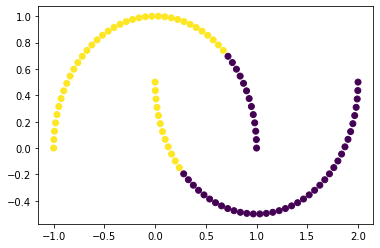

In [48]:
# create a scatter plot for inputData set with model labels color
plt.scatter(inputData[0], inputData[1], c = model.labels_)

#### finding right number of cluster

In [59]:
cluster_range = range(1, 20)
error_list = []

for i in cluster_range:
    model = KMeans(n_clusters=i)
    model.fit(inputData)
    res = model.inertia_
    error_list.append(res)

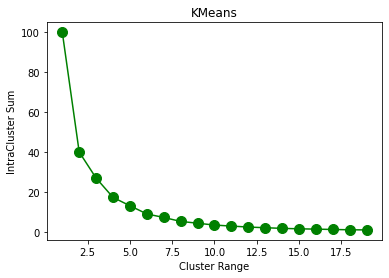

In [60]:
import matplotlib.pyplot as plt

plt.plot(cluster_range, error_list, marker = "o", color = "g", markersize = 10)
plt.xlabel("Cluster Range")
plt.ylabel("IntraCluster Sum")
plt.title("KMeans")
plt.show()